In [1]:
# save files
fullproc_r = './resources/' # for words/names

# where to save the figures that are created
fake_figs_dir = './example_scatters/' # saving in github only for small numbers
# stop overwriting what is there
#fake_figs_dir = '/Users/jnaiman/Downloads/tmp/JCDL2025/example_scatters/'

# format for saving images?
img_format = ['jpeg']

# save diagnostic plot with all items labeled?
save_diagnostic_plot = True

In [2]:
# import matplotlib.pyplot as plt
# plt.errorbar?

In [3]:
# debug
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv
import pickle
import pandas as pd
#import string
from glob import glob
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import ImageColor
import json
import os
from copy import deepcopy
import copy

from utils.metric_utils.utilities import isRectangleOverlap

import time

import matplotlib as mpl
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{amssymb}' #for \text command

# written libs -- will update locally
from utils.synthetic_fig_utils import subset_by_percent, \
 get_nrows_and_ncols, normalize_params_prob, get_ticks, get_titles_or_labels, \
 get_font_info

import utils.plot_utils
reload(utils.plot_utils)
from utils.plot_utils import get_contour_plot, get_histogram_plot, \
   get_line_plot, get_scatter_plot, make_plot, colorbar_mods, make_base_plot#, get_line_plot

from utils.text_utils import get_popular_nouns, get_inline_math

# create a bunch of fake figures
import utils.synthetic_fig_utils
reload(utils.synthetic_fig_utils)
from utils.synthetic_fig_utils import normalize_params_prob, add_titles_and_labels
from utils.plot_parameters import plot_types_params, panel_params, \
  title_params, xlabel_params, colorbar_params, \
  ylabel_params, aspect_fig_params, dpi_params, tight_layout_params, \
  fontsizes, base

from utils.data_utils import get_data, NumpyEncoder
import numpy as np

import utils.distribution_utils

from utils.plot_utils import markers
marker_sizes = np.arange(0,10)+1
line_list_thick = np.arange(1,10)

use_uniques = True # use unique inlines
verbose = True

from sys import path
path.append('/Library/TeX/texbin/')



# for seed
from sys import maxsize as maxint

import warnings
warnings.filterwarnings("error")

In [4]:
# check directories
img_dir = fake_figs_dir + '/imgs/'
if not os.path.exists(img_dir):
    os.mkdir(img_dir)
    print('made:', img_dir)
json_dir = fake_figs_dir + '/jsons/'
if not os.path.exists(json_dir):
    os.mkdir(json_dir)
    print('made:', json_dir)

In [5]:
# get fonts -- see "cnn_create_synthetic_ticks" in FullProcess
dfont = pd.read_csv(fullproc_r + 'fonts.csv')

# check that location is there
drop_names = []
for fl in dfont['font location']:
    if not os.path.exists(fl):
        drop_names.append(False)
    else:
        drop_names.append(True)

font_names = dfont.loc[drop_names]['font name'].values

# # for plot styles
# plot_styles = plt.style.available

# plot_types_qa = ['line', 'scatter', 'histogram']

plot_styles = ['default']

In [6]:
# stats for doing calculations
stats = {'minimum':np.min, 'maximum':np.max, 'median':np.median, 'mean':np.mean}

# some things to try
aspect_cut = {'min':0.3, 'max':4.0}

In [7]:
# get popular words for titles/axis
popular_nouns = get_popular_nouns(fullproc_r + 'data/')

# get inline math formulas
inlines = get_inline_math(fullproc_r,
                          recreate_inlines=False,
                         use_uniques=use_uniques)

16253 343492
shape of output= (5097, 5)
shape of output= (36332, 5)
number of inlines =  33201


## Update plotting params

### Plot type params

In [8]:
plot_params = plot_types_params.copy()

In [9]:
# probability of getting a scatter plot -- only scatters here
plot_params['scatter']['prob'] = 1

# probability of getting a line 
plot_params['line']['prob'] = 0
# prob of getting a contour plot
plot_params['contour']['prob'] = 0
# prob for getting a histogram
plot_params['histogram']['prob'] = 0

### Other parameters

In [10]:
# for ease of things, lets not do equations here
title_params['equation']['prob'] = 0.0 # probability any word will be equation
xlabel_params['equation']['prob'] = 0.0 # probability any word will be equation
ylabel_params['equation']['prob'] = 0.0 # probability any word will be equation

Renormalize all probabilities:

In [11]:
# reload for debug
import utils.synthetic_fig_utils
reload(utils)
reload(utils.synthetic_fig_utils)
from utils.synthetic_fig_utils import normalize_params_prob

plot_params_out, panel_params, \
  title_params, xlabel_params, \
  ylabel_params = normalize_params_prob(plot_params.copy(), panel_params, 
                                        title_params, xlabel_params, 
                                        ylabel_params, colorbar_params)

plot_params_out

title_params capatilize did not add to 1! total = 1.2999999999999998
renormalizing...
now:  {'none': 0.07692307692307694, 'first': 0.3846153846153847, 'all': 0.5384615384615385}
xlabel_params capatilize did not add to 1! total = 1.2999999999999998
renormalizing...
now:  {'none': 0.07692307692307694, 'first': 0.3846153846153847, 'all': 0.5384615384615385}
ylabel_params capatilize did not add to 1! total = 1.2999999999999998
renormalizing...
now:  {'none': 0.07692307692307694, 'first': 0.3846153846153847, 'all': 0.5384615384615385}
colorbar_params capatilize did not add to 1! total = 1.2999999999999998
renormalizing...
now:  {'none': 0.07692307692307694, 'first': 0.3846153846153847, 'all': 0.5384615384615385}
plot_types_params['scatter']['color bar']['location probs'] did not add to 1! total = 0.8500000000000001
renormalizing...
now:  {'right': 0.588235294117647, 'left': 0.058823529411764705, 'top': 0.2941176470588235, 'bottom': 0.058823529411764705}
plot_types_params['contour']['color b

{'line': {'prob': 0,
  'npoints': {'min': 10, 'max': 11},
  'line thick': {'min': 1, 'max': 5},
  'nlines': {'min': 2, 'max': 3},
  'xmin': -10000,
  'xmax': 10000,
  'ymin': -10000,
  'ymax': 10000,
  'prob same x': 0.1,
  'markers': {'prob': 0.5, 'size': {'min': 1, 'max': 20}},
  'error bars': {'elinewidth': {'min': 1, 'max': 5},
   'x': {'prob': 0.25, 'size': {'min': 0.01, 'max': 0.1}},
   'y': {'prob': 0.25, 'size': {'min': 0.01, 'max': 0.1}}},
  'distribution': {'random': {'prob': 0.3333333333333333},
   'linear': {'prob': 0.3333333333333333,
    'intersect': (-100, 100),
    'slope': (-5, 5),
    'noise': (0, 0.25)},
   'gmm': {'prob': 0.3333333333333333,
    'histogram as line': {'prob': 0.25, 'factor': 1000},
    'nclusters': {'min': 1, 'max': 20},
    'nsamples': {'min': 10, 'max': 500},
    'cluster std': {'min': -2, 'max': 0.5},
    'noise': {'min': 0.05, 'max': 0.25}}}},
 'histogram': {'prob': 0,
  'npoints': {'min': 10, 'max': 10000},
  'nbins': {'min': 1, 'max': 100},
  '

### Run the thing

In [12]:
# Set a seed if you want a reproducible thing
seed_outer = np.random.randint(maxint)
#seed_outer = 7526304181034464103
seed_outer = 6700012876856450103

print('seed_outer =',seed_outer)
rng_outer = np.random.default_rng(seed_outer)

seed_outer = 6700012876856450103


In [13]:
# "Inner" seed -- for things like distributions and whatnot
seed = np.random.randint(maxint)
#seed = 2870146871786070273
#seed = 7067533564274193147
print('seed = ', seed)
# based on seed, make random number generator, see: https://numpy.org/doc/2.2/reference/random/generator.html
rng = np.random.default_rng(seed)
condition_overlap_xticklabels = True

seed =  4037786087037448461


In [14]:
# set some things to keep standard across images

tight_layout = True

color_map = 'Blues' #rng_outer.choice(plt.colormaps())

plot_style = 'default' #rng_outer.choice(plot_styles)

npanels, panel_style, nrows, ncols = 1, 'square', 1, 1 #get_nrows_and_ncols(panel_params, rng=rng_outer)

aspect_fig = 0.9

dpi =  300 # int(rng_outer.uniform(low=dpi_params['min'], high=dpi_params['max']))

In [15]:
# use the "fixed" RNG outer
# get all font stuffs
title_fontsize, colorbar_fontsize, xlabel_fontsize, ylabel_fontsize, \
    xlabel_ticks_fontsize, ylabel_ticks_fontsize, \
                        csfont = get_font_info(fontsizes, font_names, rng=rng_outer)

In [16]:
choices = []; probs = []
for k,v in plot_params_out.items():
    choices.append(k)
    probs.append(v['prob'])

plot_type = rng.choice(choices, p=probs)
plot_type

np.str_('scatter')

Set a few params that we want as fixed:

In [17]:
distribution_type = 'gmm'
xmin, xmax = -1, 1 # for now
ymin,ymax = -1,1 

# now specific for *this plot*
plot_params_here = plot_params_out.copy()

plot_params_here['scatter']['xmin'] = xmin
plot_params_here['scatter']['xmax'] = xmax
plot_params_here['scatter']['ymin'] = ymin
plot_params_here['scatter']['ymax'] = ymax
# also for plotting colors
plot_params_here['scatter']['colors'] = {'min':-1, 'max':1}

plot_params_here['scatter']['distribution']['gmm']['nclusters'] = {'min': 1, 'max': 1}
plot_params_here['scatter']['distribution']['gmm']['nsamples'] = {'min': 10000, 'max': 10000}

dist_params = plot_params_here[plot_type]['distribution'] 

In [18]:
dist_params

{'random': {'prob': 0.3333333333333333},
 'linear': {'prob': 0.3333333333333333,
  'intersect': (-100, 100),
  'slope': (-5, 5),
  'noise': (0, 0.25),
  'color noise prob': 0.5},
 'gmm': {'prob': 0.3333333333333333,
  'upsample factor log': {'min': 2, 'max': 6},
  'nclusters': {'min': 1, 'max': 1},
  'nsamples': {'min': 10000, 'max': 10000},
  'cluster std': {'min': -1, 'max': 0.5},
  'noise': {'min': 0.05, 'max': 0.25},
  'color noise prob': 0.5,
  'max points': 200}}

In [26]:
import utils.distribution_utils
import utils.data_utils
reload(utils.distribution_utils)
reload(utils.data_utils)
from utils.data_utils import get_data
import utils.plot_classes_utils
reload(utils.plot_classes_utils)

prob_same_x = 1.0

seed = np.random.randint(maxint)
print('seed = ', seed)
rng = np.random.default_rng(seed)

data_for_plot = get_data(plot_params_here[plot_type],
                plot_type=plot_type,
                        distribution=distribution_type, 
                        rng=rng, prob_same_x=prob_same_x)
data_for_plot

seed =  5332725245854084749


{'xs': array([ 3.76659877e-01,  3.66657713e-01,  3.96740459e-01,  2.94493317e-01,
         3.85841772e-01,  4.68672709e-01,  3.08934690e-01,  3.49478231e-01,
         7.48065242e-02,  2.44090371e-02,  4.73775711e-01,  1.30666088e+00,
         1.05817636e-01,  3.72221050e-01,  1.34120758e-01, -2.47346493e-01,
         1.05558839e-01, -7.81396504e-02,  3.55750486e-01,  2.02610635e-01,
         4.28706338e-01, -2.92303818e-01,  1.89400475e-01,  2.32256489e-01,
         8.61761340e-01,  6.15680531e-01,  4.87230962e-01, -1.55452142e-01,
         8.44071120e-02, -1.40379530e-01,  1.53315523e-01,  1.24488114e-03,
         1.97400700e-01,  4.38494241e-01,  1.55990498e-01,  6.97956669e-01,
        -1.07801120e-01,  1.59383490e-01,  3.54700878e-02,  3.51693420e-01,
         6.08848412e-02, -1.07408047e-01,  1.65289474e-01, -8.71312933e-02,
         2.05352075e-02, -9.60111740e-02,  3.19656457e-01,  1.23544452e-01,
         2.32131430e-01,  4.12164749e-02,  2.42115626e-01,  3.66694824e-01,
      

In [28]:
def make_colorbar(data_from_plot, plot_type, fig ):
    cbar = ''
    if plot_type == 'scatter': 
        if 'color bar' in data_from_plot:
            side = data_from_plot['color bar params']['side']
            if side == 'top' or side == 'bottom':
                orientation = 'horizontal'
            else:
                orientation = 'vertical'

            cbar = fig.colorbar(data_from_plot['data'], 
                            cax=data_from_plot['color bar'], 
                            orientation=orientation)
            #cbars.append(cbar)

    if plot_type == 'contour':
        if 'color bar' in data_from_plot:
            side = data_from_plot['color bar params']['side']
            if side == 'top' or side == 'bottom':
                orientation = 'horizontal'
            else:
                orientation = 'vertical'
    
            if 'image' in data_from_plot['data']: # select correct colorbar to use
                datac = data_from_plot['data']['image']
            else:
                datac = data_from_plot['data']['contour']
                            
            cbar = fig.colorbar(datac, 
                            cax=data_from_plot['color bar'], 
                            orientation=orientation)
            #cbars.append(cbar)
    return cbar

figsize (w,h) = (1.8, 2)


<Figure size 640x480 with 0 Axes>

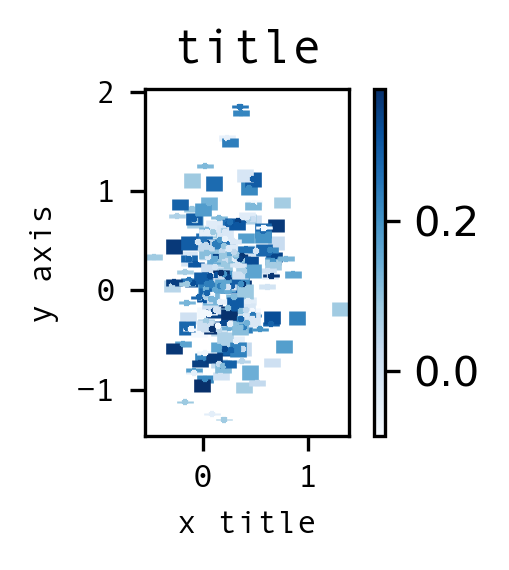

In [ ]:
import utils.plot_utils
reload(utils.plot_utils)
import utils.plot_classes_utils
reload(utils.plot_classes_utils)
from utils.plot_classes_utils import Scatter
from utils.plot_utils import make_plot, make_base_plot


fig, axes, plot_inds = make_base_plot(plot_style, color_map, dpi, nrows, ncols, aspect_fig,
                   base=2, verbose=True, tight_layout = tight_layout)

data_from_plot, ax = make_plot(plot_params_here[plot_type], data_for_plot, 
                        axes[0], plot_type=plot_type, 
                        rng=rng) 

title, xlabel, ylabel = add_titles_and_labels(axes[0], 'x title', 'y axis', 'title', 
                                              title_params, csfont, title_fontsize, 
                          xlabel_params, ylabel_params, xlabel_fontsize, ylabel_fontsize,
                          inlines, xlabel_ticks_fontsize, ylabel_ticks_fontsize,
                          rng=rng)
cbar = make_colorbar(data_from_plot, plot_type, fig)

In [24]:
data_from_plot

{'data': [<matplotlib.lines.Line2D at 0x327f78800>],
 'plot params': {'linethick': [1],
  'linestyles': [np.str_('-')],
  'markers': [''],
  'marker size': [-1],
  'colors': ['blue']},
 'x error bars': [(<matplotlib.collections.LineCollection at 0x327face30>,)]}

In [25]:
import utils.synthetic_fig_utils
reload(utils.synthetic_fig_utils)
from utils.synthetic_fig_utils import collect_plot_data_axes

Loop for several distributions and save:

In [26]:
import utils.plot_qa_utils
reload(utils.plot_qa_utils)
from utils.plot_qa_utils import init_qa_pairs

In [27]:
img_dir

'./example_lines//imgs/'

wrong length for linecolors, truncating
QUESTION: You are a helpful assistant that can analyze images.  How many lines are there in the specified figure panel? Please format the output as a json as {"nlines":""} for this figure panel, where the "nlines" value should be an integer.
ANSWER: {'nlines': 2}
QUESTION: You are a helpful assistant that can analyze images.  What are the minimum data values along the x-axis in this figure panel?  Please format the output as a json as {"minimum x":"[]"} for this figure panel, where the "minimum x" value should be a list of floats, calculated from the data values used to create the plot, where each element of the list corresponds to one line in the plot.
ANSWER: {'minimum x': {'plot0': {'minimum x': [np.float64(0.4236226605913448), np.float64(0.4227786710818135)]}}}
QUESTION: You are a helpful assistant that can analyze images.  What are the maximum data values along the x-axis in this figure panel?  Please format the output as a json as {"maximum

<Figure size 640x480 with 0 Axes>

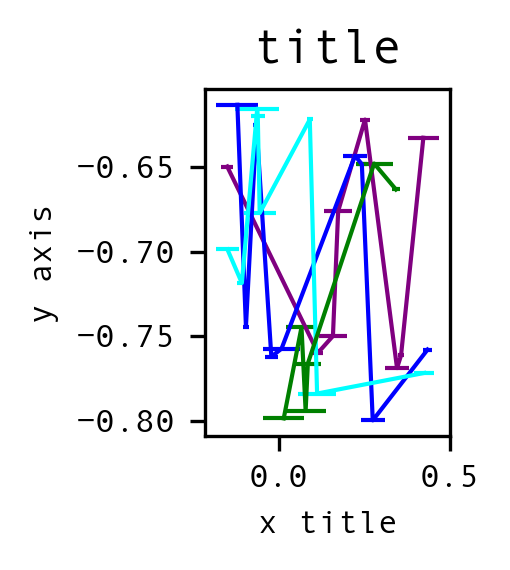

In [33]:
import utils.linear_plot_qa_utils
import utils.plot_utils
import utils.plot_qa_utils
reload(utils.linear_plot_qa_utils)
reload(utils.plot_utils)
reload(utils.plot_qa_utils)
from utils.linear_plot_qa_utils import q_nlines_plot_plotnums, q_stats_lines
from utils.plot_utils import make_plot
from utils.plot_qa_utils import how_many, how_much_data_values


## start the thing

nclusters = [1, 2, 3, 4, 5]

cluster_std = {'min':-2, 'max':0.0} # in 10^

noise = {'min': 0.05, 'max': 0.1}

linecolors = ['purple','blue','cyan','green', 'yellow', 'orange', 'red', 'magenta']

plot_json = []

ntrials = 10

verbose_qa = True

# check for github
if 'LLM_VQA_JCDL2025' in fake_figs_dir and ntrials > 10:
    print('Limiting trials for saving in github.  Change the "fake_figs_dir" param to a local address')
    ntrials = 10

for n in range(ntrials):
    for nclust in nclusters:

        # this becomes more important when we have multiple axes and more complex plots
        data_for_plots = []
        plot_types = []
        data_from_plots = []
        titles = []; xlabels = []; ylabels = []; 
        cbars = []; cbar_labels = []; cbar_words = []; cbar_nums = []
        end_time = time.time()
        distribution_types = []
        # in case axes change
        axes_save = []; cbar_axes_save = []

        plot_params_loop = plot_params_here.copy()
        plot_params_loop['line']['distribution']['gmm']['nclusters'] = {'min': nclust, 'max': nclust}
        plot_params_loop['line']['distribution']['gmm']['cluster std'] = cluster_std
        plot_params_loop['line']['distribution']['gmm']['noise'] = noise
        data_for_plot = get_data(plot_params_loop[plot_type],
                        plot_type=plot_type,
                                distribution=distribution_type, 
                                rng=rng)
        # pltjson = {}
        # pltjson['nclusters'] = nclust
        # pltjson['data for plot'] = data_for_plot.copy()

        fig, axes, plot_inds = make_base_plot(plot_style, color_map, dpi, 
                                              nrows, ncols, aspect_fig,
                        base=2, verbose=False, tight_layout = tight_layout)

        for iplot, ax in enumerate(axes):
            data_from_plot, ax = make_plot(plot_params_here[plot_type], data_for_plot, 
                                    axes[0], plot_type=plot_type, linestyles=linestyles, 
                                    rng=rng, lthick=1, linecolors=linecolors) 

            title, xlabel, ylabel = add_titles_and_labels(axes[0], 'x title', 'y axis', 'title', 
                                                        title_params, csfont, title_fontsize, 
                                    xlabel_params, ylabel_params, xlabel_fontsize, ylabel_fontsize,
                                    inlines, xlabel_ticks_fontsize, ylabel_ticks_fontsize,
                                    rng=rng)

            # save image
            base_name = 'nclust_' + str(nclust) + '_trial' + str(n)
            for imgf in img_format:
                fig.savefig(img_dir + base_name + '.' + imgf)

            ####### SAVE DATA ########
            # save data for parsing later -- only a single plot right now
            data_for_plots.append(data_for_plot)
            plot_types.append(plot_type)
            data_from_plots.append(data_from_plot)
            titles.append(title)
            xlabels.append(xlabel)
            ylabels.append(ylabel)
            distribution_types.append(distribution_type)

        fig.canvas.draw()
        width, height = fig.canvas.get_width_height()
        # save data
        datas = {}
        # figure datas
        datas['figure'] = {'dpi':dpi, 'base':base, 'aspect ratio': aspect_fig, 
                            'nrows':nrows, 'ncols':ncols, 
                            'plot style':plot_style, 
                            'color map':color_map,
                            'title fontsize':title_fontsize, 
                            'xlabel fontsize':xlabel_fontsize,
                            'ylabel fontsize':ylabel_fontsize, 
                        'plot indexes':plot_inds}
        for iplot,ax in enumerate(axes): ### JPN, colorbar
            datas['plot' + str(iplot)] = collect_plot_data_axes(ax, fig,
                           height, width,
                           data_from_plots[iplot], data_for_plots[iplot], 
                           plot_types[iplot], titles[iplot], 
                           xlabels[iplot], ylabels[iplot],
                           distribution_types[iplot], verbose=True)
            

        ######## GENERATE QA BASE #######
        qa_pairs = init_qa_pairs()
        for iplot in range(len((axes))):
            if datas['plot'+str(iplot)]['type'] == 'line':
                ############ L1 #############
                # number of bars
                if len(axes) > 1:
                    qa_pairs = q_nlines_plot_plotnums(datas, qa_pairs, 
                                                      plot_num = iplot, 
                                                      use_words=False, 
                                                      verbose=verbose_qa)
                qa_pairs = q_nlines_plot_plotnums(datas, qa_pairs, 
                                                  plot_num = iplot, 
                                                  use_words=True, 
                                                  verbose=verbose_qa)

                ###### L2 #######
                # stats items
                for axis in ['x', 'y']:
                    for k,v in stats.items():
                        if len(axes) > 1:
                            qa_pairs = q_stats_lines(datas, qa_pairs, stat={k:v}, axis=axis, plot_num=iplot, use_words=False, verbose=verbose_qa)
                        qa_pairs = q_stats_lines(datas, qa_pairs, stat={k:v}, axis=axis, plot_num=iplot, use_words=True, verbose=verbose_qa)

                # ###### L3 ######
                # # if GMM -- how many gaussians?
                # hasGMM = False
                # if 'data params' not in datas['plot'+str(iplot)]['data']:
                #     #print('Not a gmm relationship!')
                #     pass
                # else:
                #     if datas['plot'+str(iplot)]['distribution'] == 'gmm':
                #         hasGMM = True
                # if hasGMM:       
                #     qa_pairs = q_gmm_ngaussians_hists(datas, qa_pairs, plot_num=iplot, use_words=True, verbose=verbose_qa)

        datas['VQA'] = qa_pairs


        #import sys; sys.exit()

        # dump full data
        dumped = json.dumps(datas, cls=NumpyEncoder)
        with open(json_dir + base_name + '.json', 'w') as f:
            json.dump(dumped, f)

        #plot_json.append(pltjson.copy())

In [78]:
datas['plot0'].keys()

dict_keys(['type', 'distribution', 'data', 'data pixels', 'data from plot', 'xticks', 'yticks', 'square', 'title', 'xlabel', 'ylabel'])

In [83]:
len(datas['plot0']['data']['ys'])

2

In [93]:
datas['plot0']['data']['xs']

[array([-0.3805874 , -0.34909325, -0.34691688, -0.31484586, -0.28997069,
        -0.28563467, -0.28396609, -0.27308822, -0.27075973, -0.14849021,
        -0.08263919]),
 array([-0.3712019 , -0.32687785, -0.25990569, -0.17120434, -0.14888854,
        -0.1172922 , -0.11628668, -0.1133447 , -0.09618093, -0.05861432,
        -0.05847243]),
 array([-0.34731911, -0.3329955 , -0.29419968, -0.24700402, -0.20163527,
        -0.18586775, -0.11320868, -0.09927767, -0.07901077]),
 array([-0.37580907, -0.37421421, -0.31826866, -0.22066134, -0.172643  ,
        -0.07798806])]

In [ ]:
#datas['VQA']['Level 1']['Plot-level questions']

Practice reading in:

In [65]:
import json
data_file = json_dir + 'nclust_4_trial8.json'
with open(data_file,'r') as f:
    t = json.load(f)
    datas = json.loads(t)

In [38]:
datas['VQA']

{'Level 1': {'Figure-level questions': {},
  'Plot-level questions': {'nbars ': {'plot0': {'Q': 'You are a helpful assistant that can analyze images.  How many bars are there in the specified figure panel? Please format the output as a json as {"nbars":""} for this figure panel, where the "nbars" value should be an integer.',
     'A': {'nbars ': 50},
     'persona': 'You are a helpful assistant that can analyze images.',
     'context': '',
     'question': 'How many bars are there in the specified figure panel?',
     'format': 'Please format the output as a json as {"nbars":""} for this figure panel, where the "nbars" value should be an integer.'}}}},
 'Level 2': {'Plot-level questions': {'minimum ': {'plot0': {'Q': 'You are a helpful assistant that can analyze images.  What are the minimum data values in this figure panel?  Please format the output as a json as {"minimum x":""} for this figure panel, where the "minimum" value should be a float, calculated from the data values used 

In [66]:
datas['VQA']['Level 1']['Plot-level questions']

{'nbars ': {'plot0': {'Q': 'You are a helpful assistant that can analyze images.  How many bars are there in the specified figure panel? Please format the output as a json as {"nbars":""} for this figure panel, where the "nbars" value should be an integer.',
   'A': {'nbars ': 50},
   'persona': 'You are a helpful assistant that can analyze images.',
   'context': '',
   'question': 'How many bars are there in the specified figure panel?',
   'format': 'Please format the output as a json as {"nbars":""} for this figure panel, where the "nbars" value should be an integer.'}}}